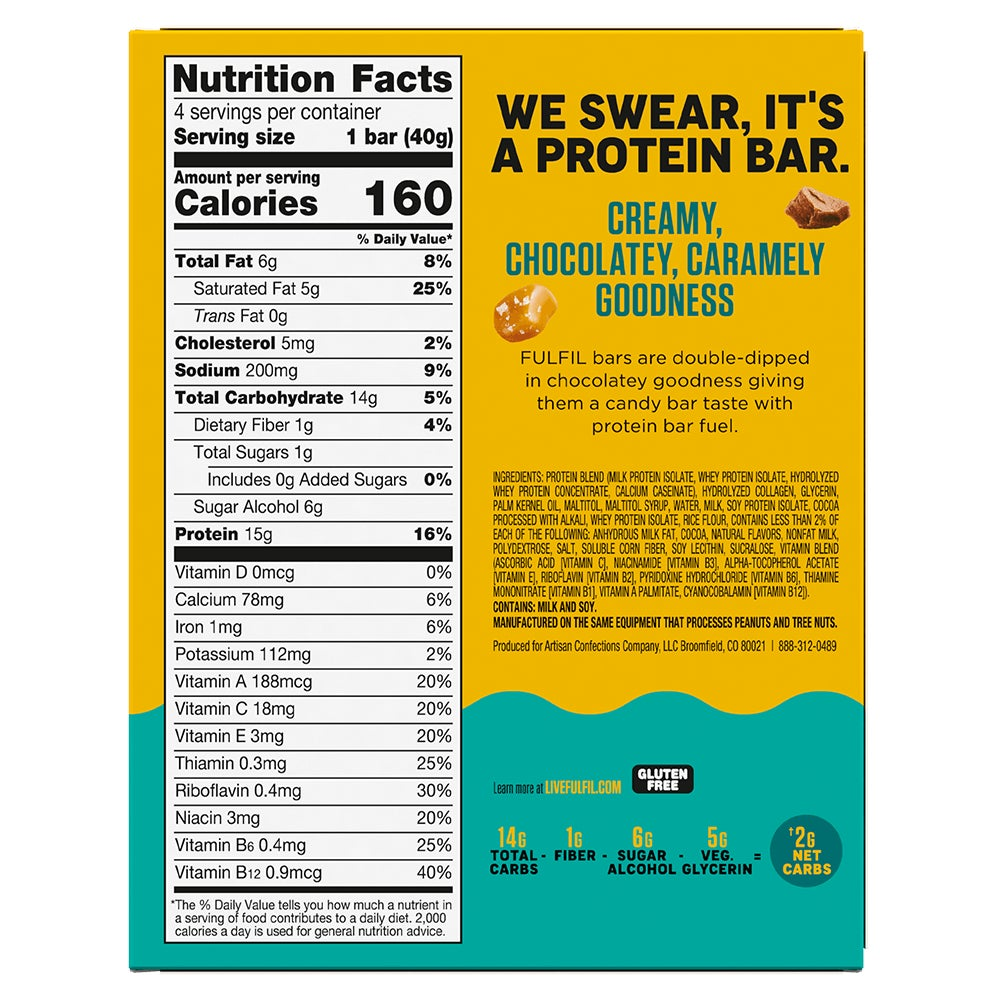

In [2]:
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

def url_to_image(url):
  """Downloads an image from a URL and converts it to an OpenCV image."""
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  return image

# Replace with your image URL
image_url = 'https://www.livefulfil.com/content/dam/fulfil/images/products/fulfil-chocolate-salted-caramel-flavor-protein-bars-1-41-oz-4-count-box-back-side.png'

# Download and display the image
image = url_to_image(image_url)

# Check if the image was loaded successfully
if image is not None:
    # Display the image using cv2_imshow
    cv2_imshow(image)
else:
    print("Error loading image from URL.")

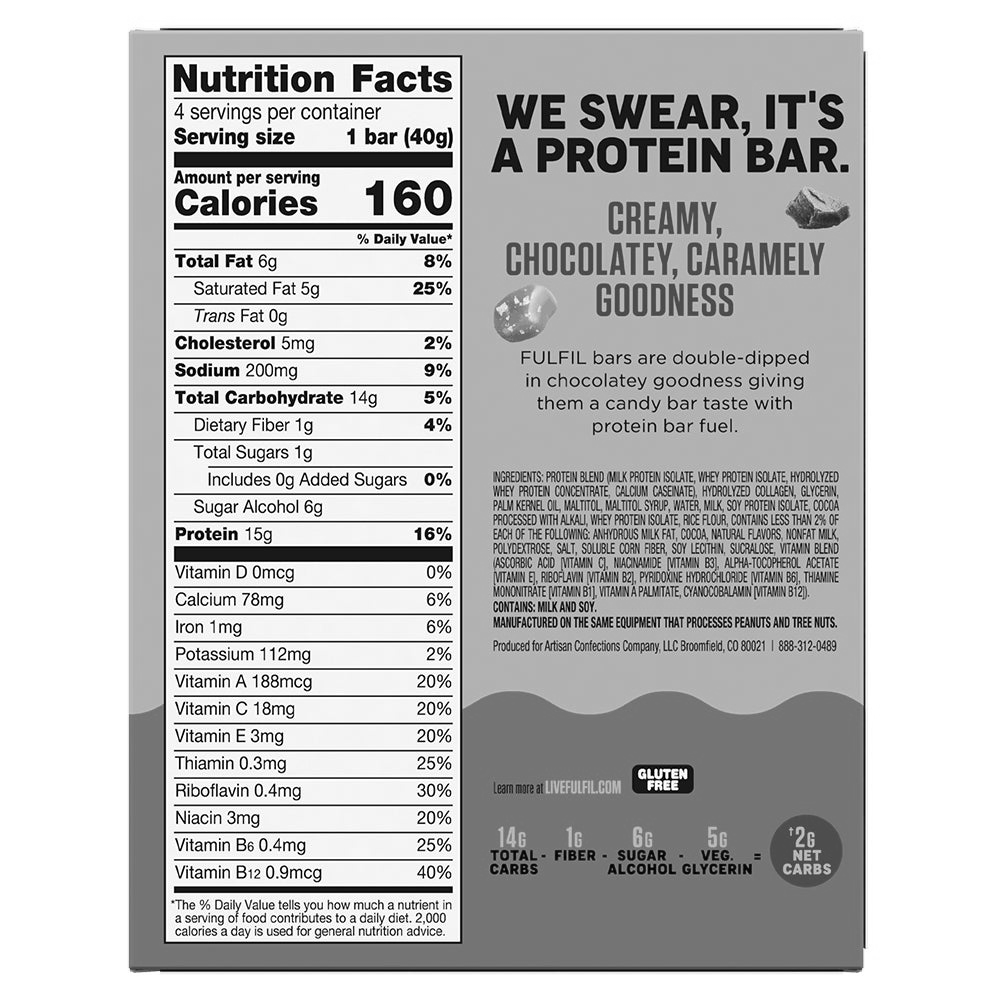

In [3]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
cv2_imshow(gray_image)

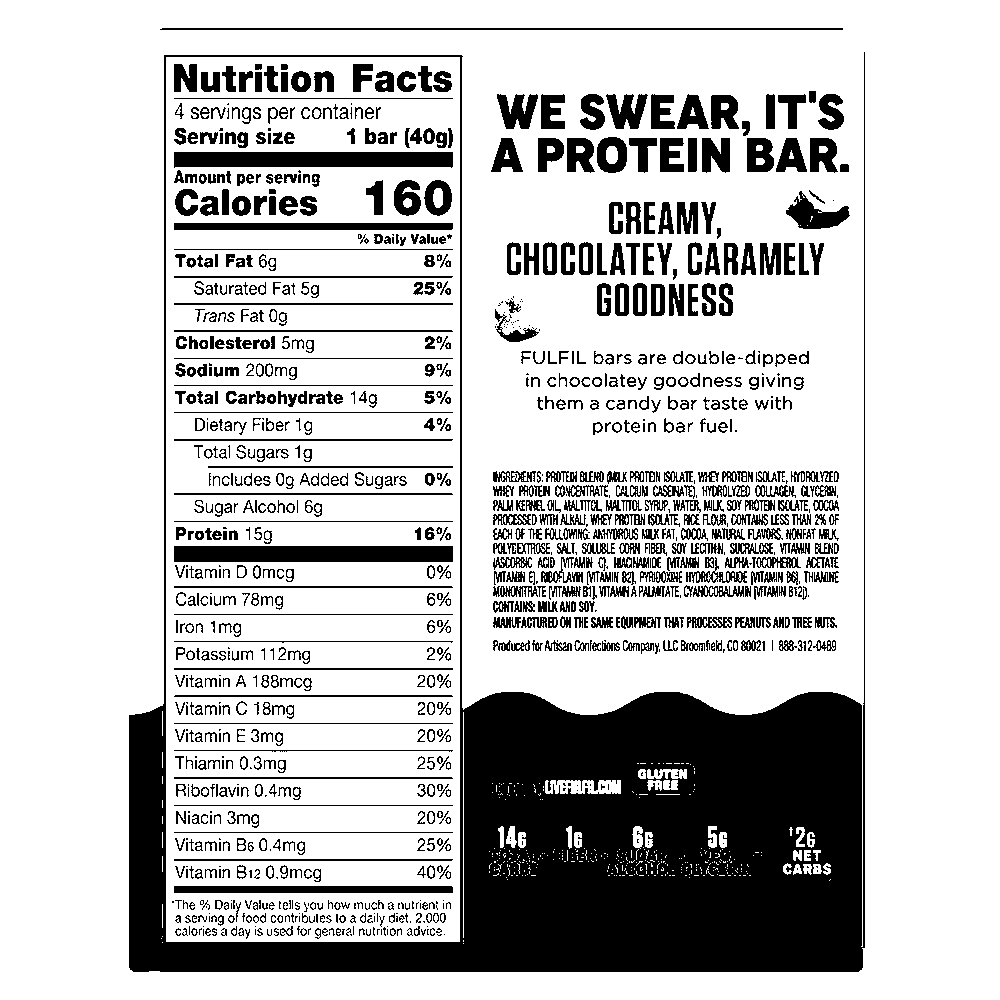

In [4]:
# Apply binary thresholding
# You may need to adjust the threshold value (e.g., 127) based on your image
ret, thresh_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Display the thresholded image
cv2_imshow(thresh_image)

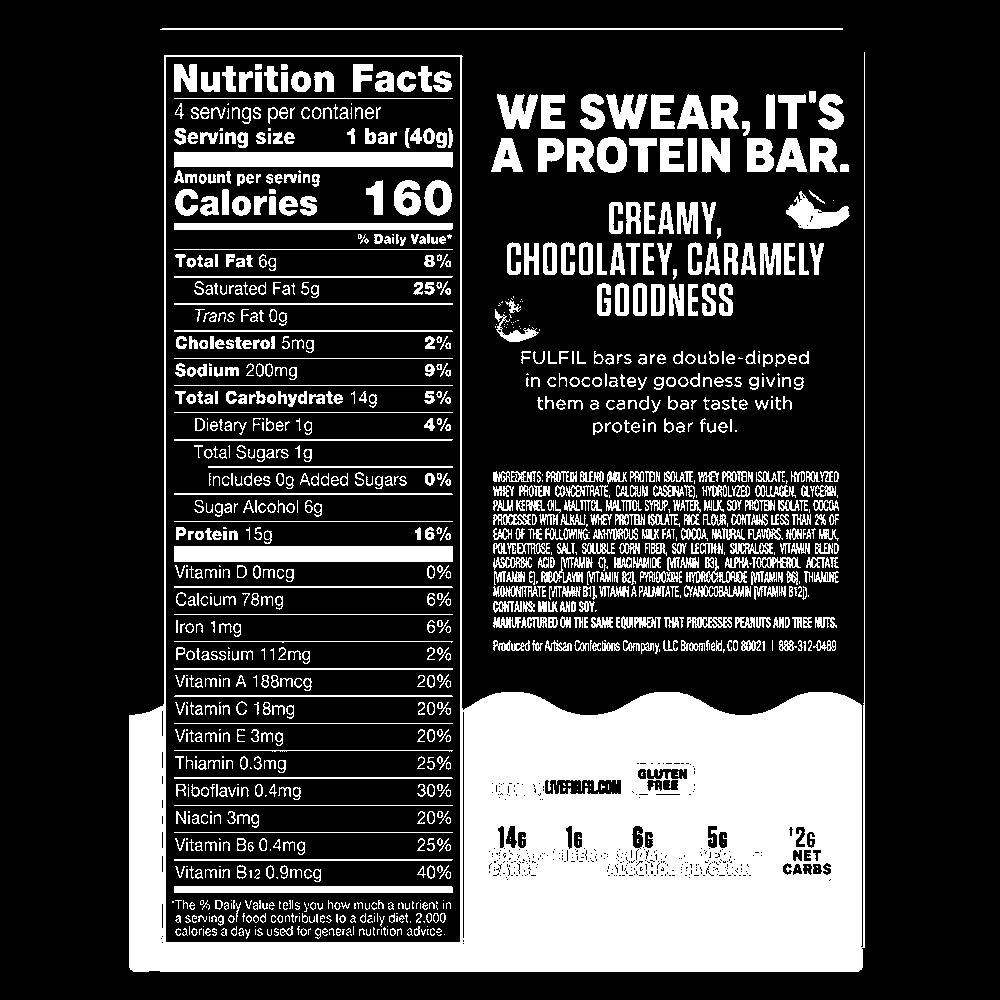

In [5]:
inverted = cv2.bitwise_not(thresh_image)
cv2_imshow(inverted)

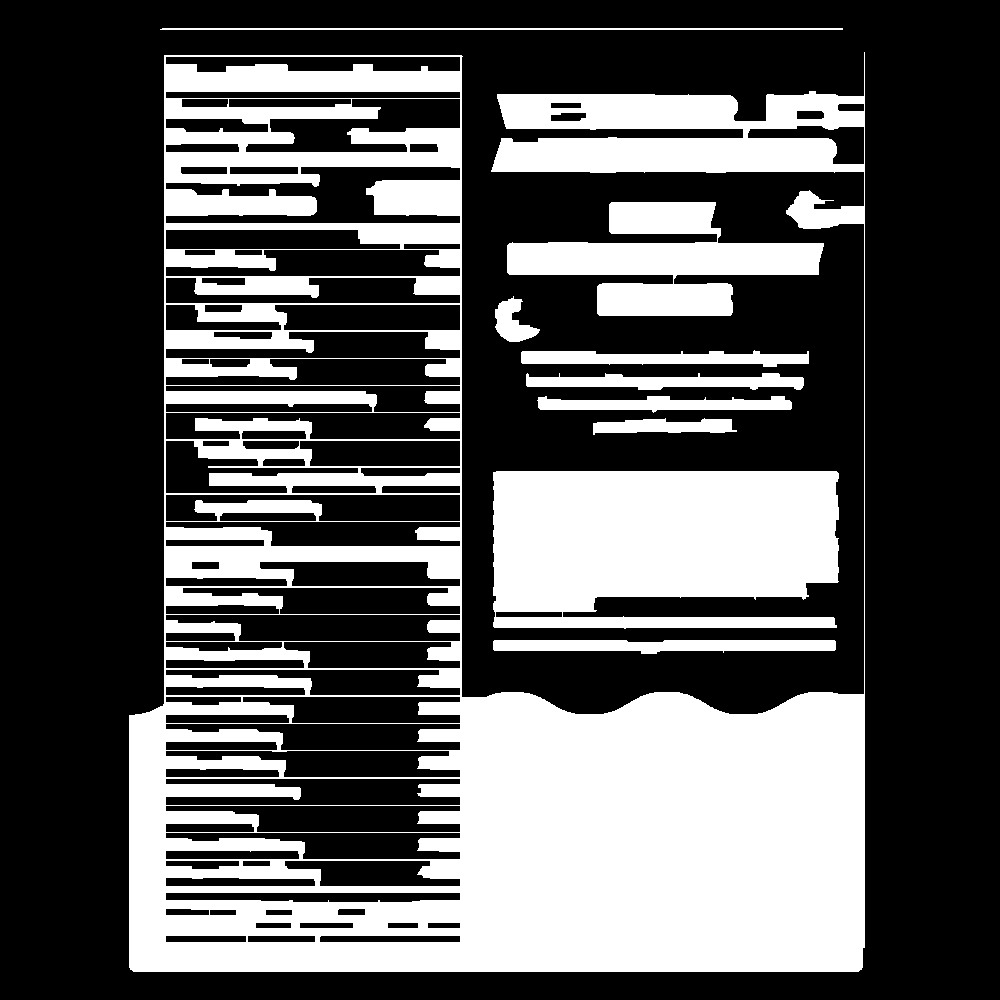

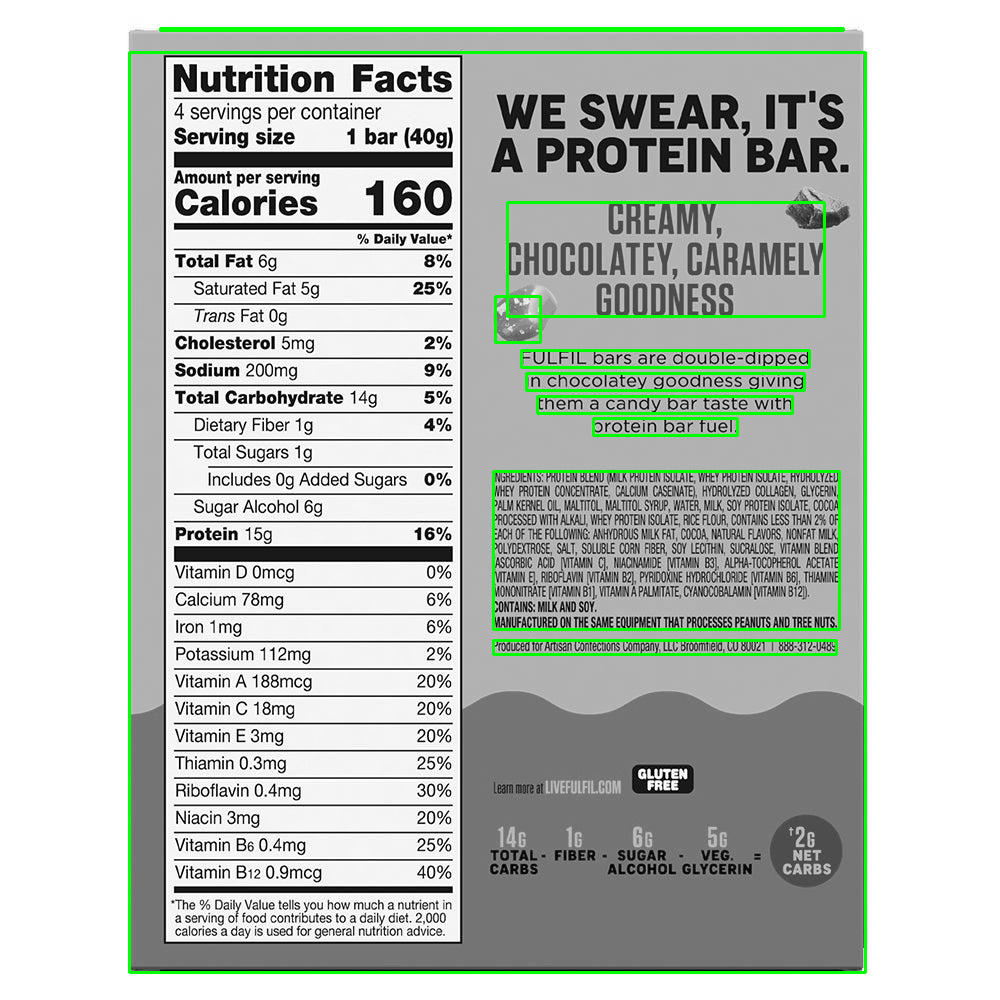

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 5))  # tune (width, height)

# Step 3: Apply morphological closing or dilation
morphed = cv2.morphologyEx(inverted, cv2.MORPH_CLOSE, kernel)
# Alternatively:
# morphed = cv2.dilate(inverted, kernel, iterations=1)

cv2_imshow(morphed)

# Step 4: Run connected components on the morphed image
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(morphed, connectivity=8)

# Step 5: Draw merged bounding boxes
output = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    if area > 200:  # ignore small noise
        cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2_imshow(output)

Displaying sub-image 1:


Displaying sub-image 2:


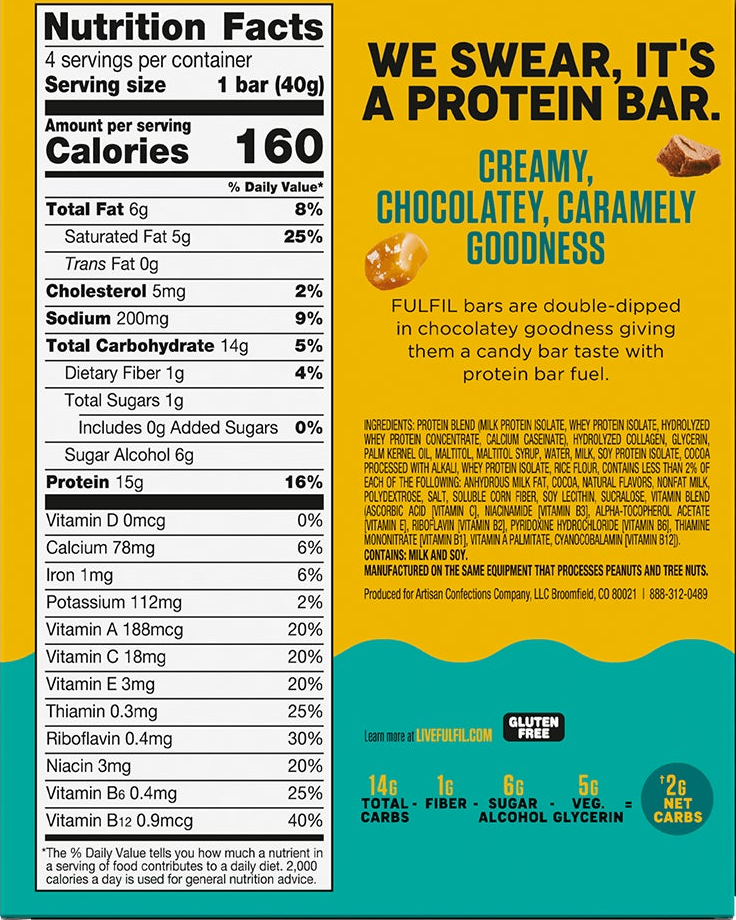

Displaying sub-image 3:


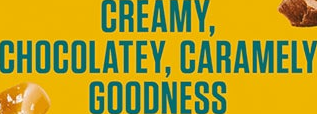

Displaying sub-image 4:


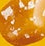

Displaying sub-image 5:


Displaying sub-image 6:


Displaying sub-image 7:


Displaying sub-image 8:


Displaying sub-image 9:


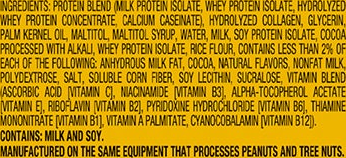

Displaying sub-image 10:


In [7]:
for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    if area > 200:  # Use the same area threshold as before to ignore noise
        # Crop the sub-image from the original image
        sub_image = image[y:y+h, x:x+w]
        # Display the cropped sub-image
        print(f"Displaying sub-image {i}:")
        cv2_imshow(sub_image)